Loading Packages and Data

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
mart1 = pd.read_csv('big_mart_data\Train.csv')
mart2 = pd.read_csv('big_mart_data/Test.csv')

# Exploratory Data Analysis

Data Structure and Content

In [3]:
datatype = pd.DataFrame([mart1.dtypes, mart2.dtypes]).T
datatype.columns= ['mart1', 'mart2']

In [4]:
datatype

,mart1,mart2
Item_Identifier,object,object
Item_Weight,float64,float64
Item_Fat_Content,object,object
Item_Visibility,float64,float64
Item_Type,object,object
Item_MRP,float64,float64
Outlet_Identifier,object,object
Outlet_Establishment_Year,int64,int64
Outlet_Size,object,object
Outlet_Location_Type,object,object


In [5]:
pd.DataFrame(mart1.info(), mart2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

""


In [6]:
mart1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
mart2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Exploratory Data Analysis 

In [8]:
mart1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
mart1.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [10]:
mart1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
mart2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [12]:
mart1.groupby('Outlet_Type')['Item_MRP', 'Item_Outlet_Sales'].agg(['min', 'max', 'mean', 'median'])

Item_MRP                                 Item_Outlet_Sales  \
                       min       max        mean    median               min   
Outlet_Type                                                                    
Grocery Store      32.6558  266.6884  140.294688  143.9128           33.2900   
Supermarket Type1  31.4900  266.8884  141.213894  143.1154           73.2380   
Supermarket Type2  31.8900  265.1884  141.678634  140.5667           69.2432   
Supermarket Type3  31.2900  265.2884  139.801791  143.7154          241.6854   

                                                       
                          max         mean     median  
Outlet_Type                                            
Grocery Store       1775.6886   339.828500   256.9988  
Supermarket Type1  10256.6490  2316.181148  1990.7420  
Supermarket Type2   6768.5228  1995.498739  1655.1788  
Supermarket Type3  13086.9648  3694.038558  3364.9532

In [13]:
mart1.Outlet_Type.value_counts().sort_values()

Supermarket Type2     928
Supermarket Type3     935
Grocery Store        1083
Supermarket Type1    5577
Name: Outlet_Type, dtype: int64

Univariate Analysis - Bivariate Analysis

EDA - Outliers

In [14]:
print(len(mart1.columns), len(mart2.columns))

12 11


In [15]:
numerical_cols = [col for col in mart1.columns if mart1[col].dtypes in ['int64', 'float64']]
numerical_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

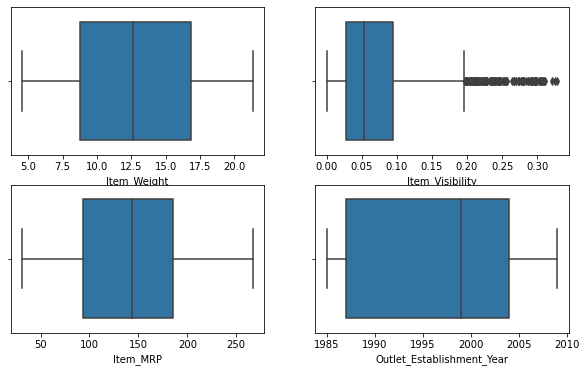

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

sns.boxplot(mart1[numerical_cols[0]], ax=ax[0,0])
sns.boxplot(mart1[numerical_cols[1]], ax=ax[0,1])
sns.boxplot(mart1[numerical_cols[2]], ax=ax[1,0])
sns.boxplot(mart1[numerical_cols[3]], ax=ax[1,1])
plt.show()
    

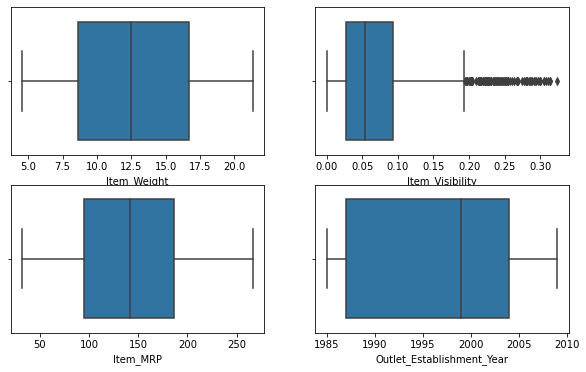

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

sns.boxplot(mart2[numerical_cols[0]], ax=ax[0,0])
sns.boxplot(mart2[numerical_cols[1]], ax=ax[0,1])
sns.boxplot(mart2[numerical_cols[2]], ax=ax[1,0])
sns.boxplot(mart2[numerical_cols[3]], ax=ax[1,1])
plt.show()

EDA - Graphs

1. scatterplot
2. lineplot
3. displot
4. histplot
5. barplot
6. heatmap

In [18]:
mart1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


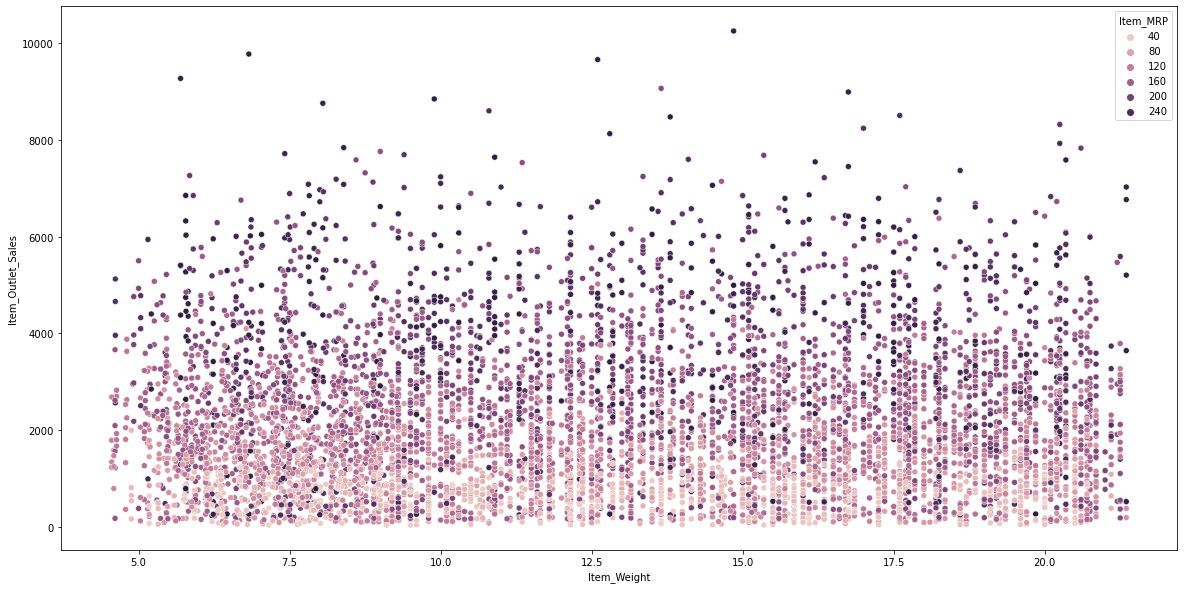

In [19]:
fig= plt.subplots(figsize=(20,10))
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', hue='Item_MRP',data=mart1)
plt.show()

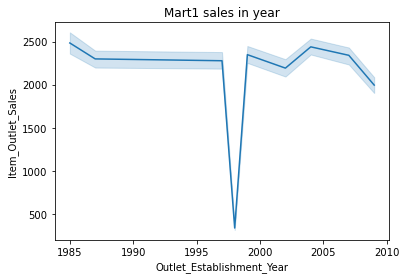

In [20]:
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=mart1)
plt.title("Mart1 sales in year")
plt.show()


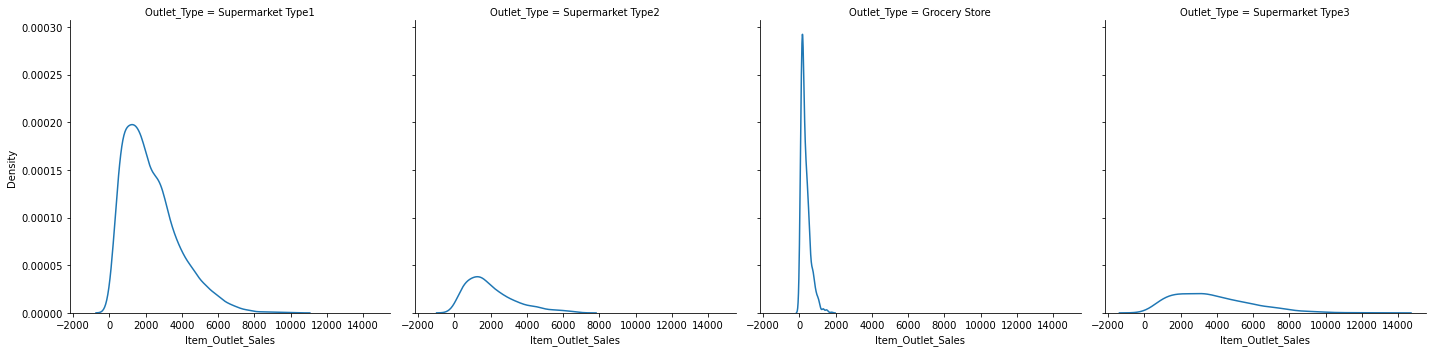

In [21]:
sns.displot(data=mart1, x='Item_Outlet_Sales', col='Outlet_Type', kind='kde')
plt.show()


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

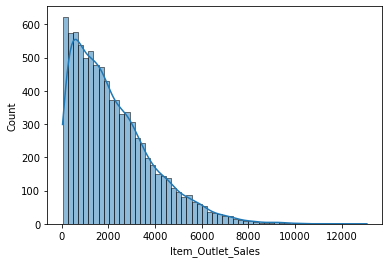

In [22]:
sns.histplot(data=mart1, x='Item_Outlet_Sales', kde=True)

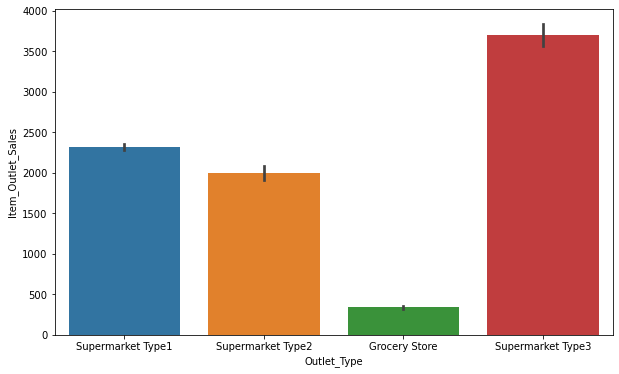

In [23]:
fig, ax= plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=mart1, x='Outlet_Type', y='Item_Outlet_Sales', ax=ax)
plt.show()

In [24]:
mart1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

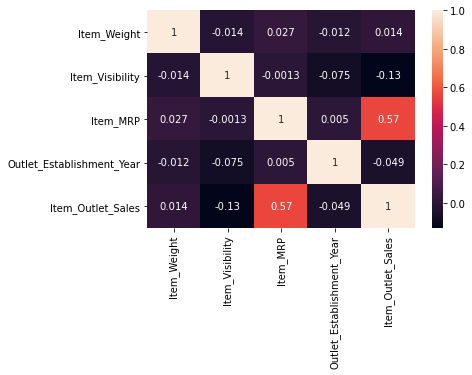

In [25]:
sns.heatmap(mart1.corr(), annot=True)

# PreProcessing Data

Missing Value Treatment or Imputation of Missing Values

In [26]:
mart1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
mart1.shape

(8523, 12)

In [28]:
mart1.Item_Weight.dtypes

dtype('float64')

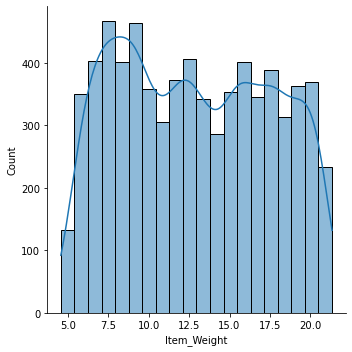

In [29]:
sns.displot(data=mart1.Item_Weight, kde=True)

In [30]:
mean = mart1.Item_Weight.mean()
mean

12.857645184136183

In [31]:
mart1[['Item_Weight']].head()

,Item_Weight
0,9.30
1,5.92
2,17.50
3,19.20
4,8.93


In [32]:
mart1['Item_Weight'] = mart1.Item_Weight.fillna(mean)

In [33]:
mart1.isna().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
mart1.Outlet_Size.dtypes

dtype('O')

In [35]:
mart1[['Outlet_Size']].head()

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High


In [36]:
median = mart1.Outlet_Size.mode()[0]
median

'Medium'

In [37]:
mart1.Outlet_Size.value_counts().sort_values(ascending=False)

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [38]:
mart1[['Outlet_Size']] = mart1.Outlet_Size.fillna(median)

In [39]:
mart1.Outlet_Size.head()

0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Outlet_Size, dtype: object

In [40]:
mart1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [41]:
mart2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [42]:
mart2.isna().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [43]:
mart2.shape

(5681, 11)

In [44]:
mart2.Outlet_Size.dtype

dtype('O')

In [45]:
median2 = mart2.Outlet_Size.mode()[0]
median2

'Medium'

In [46]:
mart2[['Outlet_Size']].head()

,Outlet_Size
0,Medium
1,NaN
2,NaN
3,NaN
4,Medium


In [47]:
mart2['Outlet_Size'] = mart2.Outlet_Size.fillna(median2)

In [48]:
mart2[['Outlet_Size']].head()

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Medium
4,Medium


In [49]:
mart2.isna().sum().sort_values(ascending=False)

Item_Weight                  976
Item_Identifier                0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [50]:
mart2[['Item_Weight']].head()

,Item_Weight
0,20.750
1,8.300
2,14.600
3,7.315
4,NaN


In [51]:
mean2 = mart2.Item_Weight.mean()
mean2

12.695633368756374

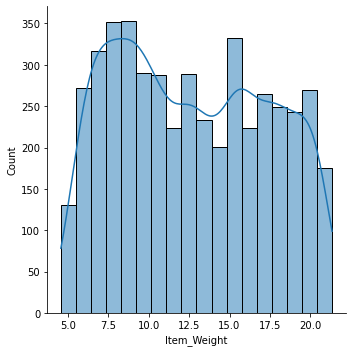

In [52]:
sns.displot(data=mart2, x='Item_Weight', kde=True)

In [53]:
mart2['Item_Weight'] = mart2.Item_Weight.fillna(mean2)

In [54]:
mart2.Item_Weight.head()

0    20.750000
1     8.300000
2    14.600000
3     7.315000
4    12.695633
Name: Item_Weight, dtype: float64

In [55]:
mart2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Feature Engineering

In [56]:
mart1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [57]:
  drop_column = mart1.loc[:, ['Item_Identifier', 'Item_Visibility', 'Outlet_Identifier']]

In [58]:
new_mart1 = mart1.drop(labels=drop_column, axis=1)
new_mart1.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
mart2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [60]:
drop_column2 = mart2.loc[:, ['Item_Identifier', 'Item_Visibility', 'Outlet_Identifier']]

In [61]:
new_mart2 = mart2.drop(labels=drop_column2, axis=1)
new_mart2.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


# String Conversion

In [62]:
new_mart1.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
new_mart1.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [64]:
new_mart1['Item_Fat_Content'] = new_mart1.Item_Fat_Content.str.lower()

In [65]:
# 'Low Fat', 'LF', 'low fat' are same. 
unique_string = new_mart1['Item_Fat_Content'].unique()

In [66]:
new_mart1.Item_Fat_Content.value_counts()

low fat    5201
regular    2889
lf          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [67]:
!pip install fuzzywuzzy

In [70]:
from fuzzywuzzy import process, fuzz

In [75]:
matches = process.extract('regular', unique_string, limit=10, scorer=fuzz.token_sort_ratio)
matches

[('regular', 100), ('reg', 60), ('lf', 22), ('low fat', 14)]

In [76]:
def replace_matching_values(df, column, string_to_match, min_ratio=47):
    # get unique strings
    string = df[column].unique()

    # get top 10 closest matches to our input string
    matches = process.extract(string_to_match, string, limit=10, scorer=fuzz.token_sort_ratio)
    
    # only get matches with a ratio > min_ratio
    close_matches = [match[0] for match in matches if match[1]>min_ratio]
    
    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)
    
    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match
    print("Done")
    

In [77]:
replace_matching_values(df=new_mart1, column='Item_Fat_Content', string_to_match="low fat", min_ratio=21)

Done


In [78]:
replace_matching_values(df=new_mart1, column='Item_Fat_Content', string_to_match="regular", min_ratio=59)

Done


In [79]:
new_mart1['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [80]:
new_mart1['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [81]:
new_mart1.Item_Fat_Content.value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [82]:
new_mart1.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [83]:
new_mart1.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [84]:
new_mart1.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [85]:
new_mart1.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [86]:
def lower_case(df, column):
    df[column] = df[column].str.lower()
    print("done")

In [87]:
lower_case(new_mart1, 'Item_Type')

done


In [88]:
lower_case(new_mart1, 'Outlet_Size')

done


In [89]:
lower_case(new_mart1, 'Outlet_Location_Type')

done


In [90]:
lower_case(new_mart1, 'Outlet_Type')

done


matching string values in new_mart2

In [91]:
new_mart2.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [92]:
new_mart2['Item_Fat_Content'] = new_mart2.Item_Fat_Content.str.lower()
new_mart2.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,low fat,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,low fat,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,low fat,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,regular,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [93]:
unique_column_val = new_mart2.Item_Fat_Content.unique()
unique_column_val

array(['low fat', 'reg', 'regular', 'lf'], dtype=object)

In [95]:
process.extract('regular', unique_column_val, scorer = fuzz.token_sort_ratio)

[('regular', 100), ('reg', 60), ('lf', 22), ('low fat', 14)]

In [96]:
replace_matching_values(df=new_mart2, column='Item_Fat_Content', string_to_match="low fat", min_ratio=21)

Done


In [97]:
new_mart2.Item_Fat_Content.value_counts()

low fat    3668
regular    1935
reg          78
Name: Item_Fat_Content, dtype: int64

In [98]:
replace_matching_values(df=new_mart2, column='Item_Fat_Content', string_to_match="regular", min_ratio=59)

Done


In [99]:
new_mart2.Item_Fat_Content.value_counts()

low fat    3668
regular    2013
Name: Item_Fat_Content, dtype: int64

In [100]:
new_mart2.Item_Type.unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [101]:
 new_mart2['Item_Type']= new_mart2.Item_Type.str.lower()

In [102]:
new_mart2.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [103]:
 new_mart2['Outlet_Size'] = new_mart2.Outlet_Size.str.lower()

In [104]:
new_mart2.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [105]:
new_mart2['Outlet_Location_Type'] = new_mart2.Outlet_Location_Type.str.lower()

In [106]:
new_mart2.Outlet_Type.unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [107]:
new_mart2['Outlet_Type'] = new_mart2.Outlet_Type.str.lower()

In [108]:
new_mart1.columns = new_mart1.columns.str.lower()

In [109]:
new_mart1.head()

,item_weight,item_fat_content,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.30,low fat,dairy,249.8092,1999,medium,tier 1,supermarket type1,3735.1380
1,5.92,regular,soft drinks,48.2692,2009,medium,tier 3,supermarket type2,443.4228
2,17.50,low fat,meat,141.6180,1999,medium,tier 1,supermarket type1,2097.2700
3,19.20,regular,fruits and vegetables,182.0950,1998,medium,tier 3,grocery store,732.3800
4,8.93,low fat,household,53.8614,1987,high,tier 3,supermarket type1,994.7052


In [110]:
new_mart2.columns = new_mart2.columns.str.lower()

In [111]:
new_mart2.head()

,item_weight,item_fat_content,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,20.750000,low fat,snack foods,107.8622,1999,medium,tier 1,supermarket type1
1,8.300000,regular,dairy,87.3198,2007,medium,tier 2,supermarket type1
2,14.600000,low fat,others,241.7538,1998,medium,tier 3,grocery store
3,7.315000,low fat,snack foods,155.0340,2007,medium,tier 2,supermarket type1
4,12.695633,regular,dairy,234.2300,1985,medium,tier 3,supermarket type3


# Label Encoding

 Label Encoding is only used in target feature.
 Target feature of dataset i.e. item_outlet_sales is number so label encoding has no use in this dataset.

# One Hot Encoding

In [112]:
bigmart1 = new_mart1.copy()

In [175]:
bigmart2 = new_mart2.copy()

In [113]:
cat_columns = [col for col in bigmart1.columns if bigmart1[col].dtypes=='object']
cat_columns

['item_fat_content',
 'item_type',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

In [180]:
[col for col in bigmart2.columns if bigmart2[col].dtypes=='object']


['item_fat_content',
 'item_type',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

In [176]:
bigmart2.columns

Index(['item_weight', 'item_fat_content', 'item_type', 'item_mrp',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type'],
      dtype='object')

In [132]:
ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)

In [133]:
ohe.fit_transform(bigmart1[cat_columns])

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [177]:
ohe.transform(bigmart2[cat_columns])

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [134]:
cat_feature_array = ohe.fit_transform(bigmart1[cat_columns])

In [178]:
cat2_feature_array = ohe.transform(bigmart2[cat_columns])

In [135]:
cat_feature_array

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [136]:
cat_feature_array.shape

(8523, 23)

In [182]:
cat2_feature_array.shape

(5681, 23)

In [172]:
ohe.categories_

[array(['low fat', 'regular'], dtype=object),
 array(['baking goods', 'breads', 'breakfast', 'canned', 'dairy',
        'frozen foods', 'fruits and vegetables', 'hard drinks',
        'health and hygiene', 'household', 'meat', 'others', 'seafood',
        'snack foods', 'soft drinks', 'starchy foods'], dtype=object),
 array(['high', 'medium', 'small'], dtype=object),
 array(['tier 1', 'tier 2', 'tier 3'], dtype=object),
 array(['grocery store', 'supermarket type1', 'supermarket type2',
        'supermarket type3'], dtype=object)]

In [157]:
ohe_feature = ['item_weight', 'item_mrp', 'outlet_establishment_year', 'item_outlet_sales',
              'regular',
              'breads', 'breakfast', 'canned', 'dairy', 'frozen foods', 'fruits and vegetables', 'hard drinks', 'health and hygiene', 'household', 'meat', 'others', 'seafood', 'snack foods', 'soft drinks', 'starchy foods',
              'medium', 'small',
              'tier 2', 'tier 3',
              'supermarket type1', 'supermarket type2', 'supermarket type3']

In [188]:
feature2 = ['item_weight', 'item_mrp', 'outlet_establishment_year',
              'regular',
              'breads', 'breakfast', 'canned', 'dairy', 'frozen foods', 'fruits and vegetables', 'hard drinks', 'health and hygiene', 'household', 'meat', 'others', 'seafood', 'snack foods', 'soft drinks', 'starchy foods',
              'medium', 'small',
              'tier 2', 'tier 3',
              'supermarket type1', 'supermarket type2', 'supermarket type3']

In [159]:
len(ohe_feature)

27

In [147]:
numerical_cols = [cols for cols in bigmart1.columns if bigmart1[cols].dtypes in ['int64', 'float64']]
numerical_cols

['item_weight', 'item_mrp', 'outlet_establishment_year', 'item_outlet_sales']

In [184]:
numerical_cols2 = [cols for cols in bigmart2.columns if bigmart2[cols].dtypes in ['int64', 'float64']]
numerical_cols2

['item_weight', 'item_mrp', 'outlet_establishment_year']

In [162]:
data = np.hstack((bigmart1[numerical_cols].values, cat_feature_array))

In [186]:
data2 = np.hstack((bigmart2[numerical_cols2].values, cat2_feature_array))

In [165]:
new_bigmart1 = pd.DataFrame(data, columns=ohe_feature)

In [189]:
new_bigmart2 = pd.DataFrame(data2, columns=feature2)

In [192]:
new_bigmart2.shape

(5681, 26)

In [193]:
new_bigmart1.shape

(8523, 27)

# Data Modeling

Training data = new_bigmart1
Testing data = new_bigmart2

In [195]:
X_train = new_bigmart1.drop(columns='item_outlet_sales', axis=1)
y_train = new_bigmart1['item_outlet_sales']

In [199]:
X_test = new_bigmart2

In [202]:
y_train.shape

(8523,)

In [201]:
X_train.shape

(8523, 26)

In [200]:
X_test.shape

(5681, 26)

# Robust Scaler

In [210]:
robust = RobustScaler()

In [212]:
X_train = robust.fit_transform(X_train)

In [214]:
X_test = robust.transform(X_test)

# Linear Regression

In [215]:
reg = LinearRegression()

In [216]:
reg.fit(X_train, y_train)

LinearRegression()

In [217]:
reg.predict(X_test)

array([1774.98956854, 1558.68725894, 1881.98816867, ..., 1839.46000206,
       3605.19561775, 1306.94930034])

In [218]:
reg.score(X_train, y_train)

0.5633906399598364

# Regularized Linear Regression

In [254]:
lasso = Lasso(alpha=1, max_iter=100, tol=0.1)

In [255]:
lasso.fit(X_train, y_train)

Lasso(alpha=1, max_iter=100, tol=0.1)

In [256]:
lasso.predict(X_test)

array([1765.8568957 , 1521.68369219, 1917.13969594, ..., 1905.55290171,
       3541.54350584, 1359.20715744])

In [257]:
lasso.score(X_train, y_train)

0.5630206175791483

# Random Forest

In [258]:
random = RandomForestRegressor(random_state=1)

In [259]:
random.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [260]:
random.predict(X_test)

array([1493.882092, 1407.93397 ,  609.067182, ..., 1689.920244,
       3668.944164, 1292.557488])

In [261]:
random.score(X_train, y_train)

0.935155020800887

# XGBoost

In [207]:
!pip install xgboost

In [272]:
xg = XGBRegressor(n_estimators=500, learning_rate=0.1)

In [277]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [280]:
final_prediction = xg.predict(X_test)

In [279]:
xg.score(X_train, y_train)

0.8574150792727693

# Summary

XGBRegressor prevents the testing data from overfitting and underfitting.

# Final Prediction Submission

In [283]:
output = pd.DataFrame({'Id':mart2.Item_Identifier,
              'FinalPrediction': final_prediction
})
output.to_csv('Submission.csv', index=False)